# Magic Metro Bus

### Example notebook to demonstrate package capabilities

### Auto sorting the data

Ensure there is a folder titled 'Raw Data' in your current directory containing KCM-data-files.zip, then import the function:

In [4]:
%%time
import os
os.getcwd()

CPU times: user 84 µs, sys: 3 µs, total: 87 µs
Wall time: 88.9 µs


'/home/clgould99/TheBattmobile/Alfred/py_packages'

In [1]:
%%time
import auto_sort_data

CPU times: user 1min 59s, sys: 2.47 s, total: 2min 1s
Wall time: 2min


In [2]:
import os
from auto_sort_data import find_directory

# Define the directory paths
sorted_directory = find_directory() + 'sorted_data'
vis_directory = find_directory() + 'vis_buses'
all_directory = find_directory() + 'all_buses'

# Iterate over each directory and print the number of folders
for directory, name in zip([sorted_directory, vis_directory, all_directory], ['sorted_data', 'vis_buses', 'all_buses']):
    # Get the list of all files and folders in the directory
    items = os.listdir(directory)
    # Filter out only the directories
    folders = [item for item in items if os.path.isdir(os.path.join(directory, item))]
    # Count the number of directories
    num_folders = len(folders)
    # Print the result
    print(f"Number of folders in {name}: {num_folders}")


Number of folders in sorted_data: 113
Number of folders in vis_buses: 66
Number of folders in all_buses: 176


You should now have 2 new folders: 'sorted_data' containing bus data with no module changes and 'vis_buses' containing data with modules that have been swapped.

## Building dataframes from the csv files

Directly reading the csv files into a dataframe formats the data in an impractical way:

In [4]:
import pandas as pd

examp_file = auto_sort_data.find_directory() + 'vis_buses/' + 'bus_1/' + '0016_ProfileData_20180731061359.csv'
df = pd.read_csv(examp_file)

df

FileNotFoundError: [Errno 2] No such file or directory: '/home/clgould99/TheBattmobile/Alfred/py_packages/vis_buses/bus_1/0016_ProfileData_20180731061359.csv'

Our data building functions allow the csvs to be parsed into meaningful dataframes for statistical analysis and visualizations.

In [3]:
import build_data_vis

In [3]:
directory = build_data_vis.find_directory() + 'vis_buses/'

The sort_bus_by_date function creates a dataframe that orders the file names for a given bus by date retrieved.

In [4]:
df_bus_dates = build_data_vis.sort_bus_by_date(directory, 'bus_1/')
df_bus_dates

FileNotFoundError: [Errno 2] No such file or directory: '/home/clgould99/TheBattmobile/py_packages/vis_buses/bus_1/'

The build_bus_df takes as input a directory, a string of the desired bus directory, and a keyword (selected from 'Current', 'Voltage', or 'Power'. The function returns a dataframe of the entire bus current, voltage, or power over time, with the order of the rows being sequential by date.

In [6]:
build_data_vis.build_bus_df(directory, 'bus_1/', 'Voltage')

AttributeError: 'DataFrame' object has no attribute 'append'

The build_module_df function takes as input a directory, a string of the desired bus directory, and an integer module number (can be between 1 and 16). The function returns a dataframe of the module voltages with the rows sequential in time. Note that the module data within the csv files is further subdivided into 12 submodules. Therefore, this function will output 12 rows for each date retrieved within the bus folder. For example, running this function on bus 1 module 1 should return a dataframe with 216 rows. Rows 0-11 correspond to the first date in the bus folder, then rows 12-24 to the next date, etc.

In [8]:
build_data_vis.build_module_df(directory, 'bus_1/', 1)

AttributeError: 'DataFrame' object has no attribute 'append'

The build_module_df function is similar to the above function, but it averages the submodule data together to return only one row for each date for the module specified. This allows for easier visualization of voltages on the module level.

In [9]:
build_data_vis.build_module_average_df(directory, 'bus_1/', 1)

AttributeError: 'DataFrame' object has no attribute 'append'

The count_mod_changes function takes as an input a directory of data sorted by bus. The function will then return a dataframe showing the bus and module number as well as the number of times the module has been changed.

In [15]:
build_data_vis.count_mod_changes(directory)

,Bus,Module,Date,Change
0,1,1,"09/20/2017, 06:36:19",0
1,1,1,"09/20/2017, 08:29:04",0
2,1,1,"03/20/2018, 10:36:30",0
3,1,1,"07/31/2018, 06:14:11",0
4,1,1,"07/31/2018, 06:30:55",0
...,...,...,...,...
59,98,15,"05/30/2018, 08:13:37",1
60,98,16,"09/18/2017, 06:43:27",0
61,98,16,"09/18/2017, 10:52:47",1
62,98,16,"02/26/2018, 06:40:43",1


The find_replaced_modules function takes as an input a directory of data sorted by bus. The function will return a dictionary with the bus number as the key and the serial number of the modules that have full lifetime data as the values.

In [3]:
build_data_vis.find_replaced_modules(directory)

{'bus_1': [' 0039-1811-00U-402335-00804......'],
 'bus_10': [' 0039-1638-0HC-402335-00802..&...'],
 'bus_154': [" 0039-1635-06T-402335-00802..'..."],
 'bus_2': [' 0039-1522-04F-402335-00710......',
  ' 0039-1602-0L2-402335-00710......',
  ' 0039-0951-0DM-402335-00108..&...',
  ' 0039-1641-0P2-402335-00802..)...',
  ' 364A1585G3REVA-14A3920..........',
  ' 0039-1632-0UG-402335-00710.. ...',
  ' 0039-1641-0PD-402335-00802..)...',
  ' 364A1585G3REVA-14A3924..........',
  ' 0039-0951-0HB-402335-00108..&...',
  ' 0039-1632-0UH-402335-00710.. ...',
  ' 0039-1630-0LT-402335-00710......',
  ' 0039-1632-0UP-402335-00710.. ...',
  ' 364A1585G3REVA-14A3925..........',
  ' 364A1585G3REVA-14A3919..........',
  ' 364A1585G3REVA-14A3917..........',
  ' 0039-1632-0UL-402335-00710.. ...',
  ' 0039-1630-0LW-402335-00710......',
  ' 0039-1630-0LV-402335-00710......',
  ' 364A1583G100-13L0049............',
  ' 0039-0951-0DP-402335-00108..&...',
  ' 0039-1630-0M2-402335-00710......',
  ' 0039-1632-0UK-4023

The swapped_module_dataframes function takes as an input a directory, a module serial number, and a keyword. The function then returns a dataframe of the input module characteristic. For example, inputting your directory with the serial number for bus 1 module 1 and the keyword 'balancers' will return a dataframe of the cell balancer data for that module, with the rows sequential by time.

In [6]:
build_data_vis.swapped_mod_dataframes(directory, ' 0039-1811-00U-402335-00804......', 'balancers')

[                                            Off      On    TOTAL
 <Cell Balancers>  09/20/2018, 06:30:57                          
 CELL 1                                  1030246  106943  1137189
 CELL 2                                  1028063  109126  1137189
 CELL 3                                  1029071  108118  1137189
 CELL 4                                  1027367  109822  1137189
 CELL 5                                  1028041  109148  1137189
 CELL 6                                  1026996  110193  1137189
 CELL 7                                  1028023  109166  1137189
 CELL 8                                  1025681  111508  1137189
 CELL 9                                  1026528  110661  1137189
 CELL 10                                 1023558  113631  1137189
 CELL 11                                 1022981  114208  1137189
 CELL 12                                 1025729  111460  1137189,
                                             Off      On    TOTAL
 <Cell Ba

## Visualizing the parsed data:

Our visualization functions take the parsed data from our data building functions to help visualize trends in swapped modules.

visualize_mod_changes: This function uses the count_mod_changes output to produce a heat map for all buses indicating when the modules have been changed (with a color change indicating the module has been changed). The heat map includes a drop down menu to select the desired bus.

In [3]:
build_data_vis.visualise_mod_changes(directory)

alt.Chart(...)

The function mod_change_statistics returns the average times changed per module across all buses represented in our dataset.

<AxesSubplot:xlabel='Module', ylabel='Average times changed'>

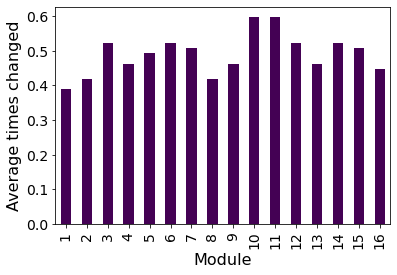

In [4]:
build_data_vis.mod_change_statistics(directory)

visualize_mod_time: This function uses the build_module_average_df output to visualize the distribution of time spent at each voltage in the voltage range for a given module. For example, running this function with the input of bus 1 and module 1 will return a graph with 12 plotted lines, one for each individual date in bus one, where the x axis is voltage and the y axis is time in seconds. A dropdown menu is available on the graph to select a specific date. The selected date will remain in color while the other dates will be rendered gray. The axes are also scalable by clicking and dragging and using your mouse scroll.

In [5]:
build_data_vis.visualize_mod_time(directory, 'bus_1/', 11)

alt.Chart(...)